In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

In [18]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

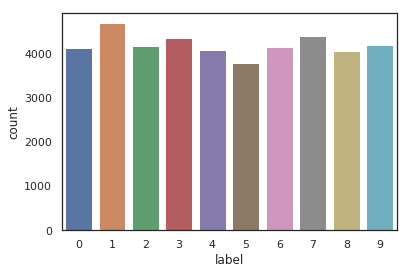

In [19]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis = 1)

del train

g = sns.countplot(Y_train)
Y_train.value_counts()

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [20]:
X_train.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
pixel6      False
pixel7      False
pixel8      False
pixel9      False
pixel10     False
pixel11     False
pixel12     False
pixel13     False
pixel14     False
pixel15     False
pixel16     False
pixel17     False
pixel18     False
pixel19     False
pixel20     False
pixel21     False
pixel22     False
pixel23     False
pixel24     False
pixel25     False
pixel26     False
pixel27     False
pixel28     False
pixel29     False
            ...  
pixel754    False
pixel755    False
pixel756    False
pixel757    False
pixel758    False
pixel759    False
pixel760    False
pixel761    False
pixel762    False
pixel763    False
pixel764    False
pixel765    False
pixel766    False
pixel767    False
pixel768    False
pixel769    False
pixel770    False
pixel771    False
pixel772    False
pixel773    False
pixel774    False
pixel775    False
pixel776    False
pixel777    False
pixel778  

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train = X_train / 255.0
test = test / 255.0
X_train.shape

(42000, 784)

In [38]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_train.shape
test = test.values.reshape(-1,28,28,1)

In [9]:
Y_train = to_categorical(Y_train, num_classes=10)

In [10]:
random_seed = 2

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

In [21]:
train_test_split?

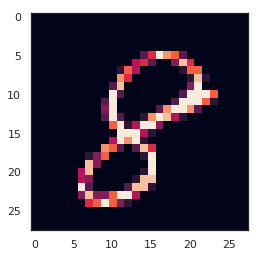

In [12]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

### Model

In [13]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding='Same', activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, (5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='Same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [14]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
#batch_size = 86
batch_size = 256

In [15]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [17]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 19s - loss: 0.6242 - acc: 0.7989 - val_loss: 0.0958 - val_acc: 0.9705
Epoch 2/30
 - 8s - loss: 0.1831 - acc: 0.9440 - val_loss: 0.0671 - val_acc: 0.9819
Epoch 3/30
 - 9s - loss: 0.1273 - acc: 0.9620 - val_loss: 0.0407 - val_acc: 0.9881
Epoch 4/30
 - 10s - loss: 0.0981 - acc: 0.9706 - val_loss: 0.0443 - val_acc: 0.9862
Epoch 5/30
 - 11s - loss: 0.0840 - acc: 0.9745 - val_loss: 0.0283 - val_acc: 0.9929
Epoch 6/30
 - 13s - loss: 0.0724 - acc: 0.9788 - val_loss: 0.0268 - val_acc: 0.9919
Epoch 7/30
 - 10s - loss: 0.0652 - acc: 0.9805 - val_loss: 0.0236 - val_acc: 0.9931
Epoch 8/30
 - 13s - loss: 0.0616 - acc: 0.9814 - val_loss: 0.0244 - val_acc: 0.9924
Epoch 9/30
 - 11s - loss: 0.0568 - acc: 0.9830 - val_loss: 0.0273 - val_acc: 0.9919
Epoch 10/30
 - 12s - loss: 0.0532 - acc: 0.9843 - val_loss: 0.0266 - val_acc: 0.9924

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/30
 - 11s - loss: 0.0421 - acc: 0.9873 - val_loss: 0.0179 - val_acc: 0.

评估模型

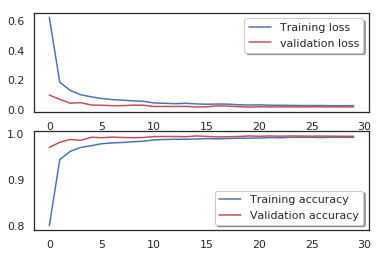

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

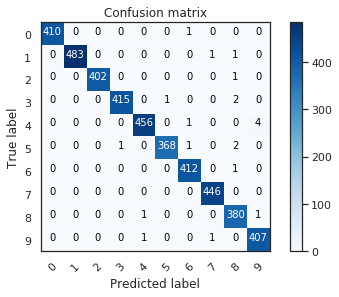

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [24]:
# 得到的是bool值，每一个数据是否预测正确
errors = (Y_pred_classes - Y_true != 0)
# 错误预测的预测值
Y_pred_classes_errors = Y_pred_classes[errors]
# 错误预测上各个数字预测概率
Y_pred_errors = Y_pred[errors]
# 真实值
Y_true_errors = Y_true[errors]
# 对应的图像
X_val_errors = X_val[errors]

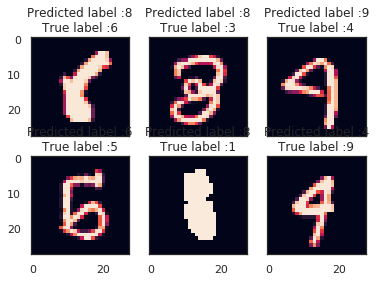

In [36]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [39]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [40]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)